# MA933 Assignment 3

*Student ID: 2260253*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# built-in statistics function for unbiased variance
from statistics import variance

# probability distributions
from scipy import stats

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

**Question 2**

For ease of reproducibility the below cell will generate the 20 realisations $G_{N,p}$ for each $z \in \{0.1,0.2,...,3.0\}$ and $N \in \{100,1000\}$ and combine the computational tasks in parts a,b and c

In [4]:
Ns = [100, 1000]                  # number of nodes
zs = np.arange(0.1,3.1,0.1)       # expected degree
realisations = 20

# average sizes of largest and second largest components
L1avg = []
L2avg = []

# and standard deviations
L1err = []
L2err = []

# average number of edges
Eavg = []
Eerr = []

# average degree
davg = []
davgerr = []

for N in Ns:
    for z in zs:
        # probability that an edge is added
        p = z/N
        
        # bins for largest and second largest componenets
        L1 = []
        L2 = []
        
        E = []    # number of edges
        d = []    # average degree
        
        for r in range(realisations):
            # generate ER random graph
            G = nx.gnp_random_graph(N,p)
        
            # get the components
            Gcc = sorted([G.subgraph(c) for c in nx.connected_components(G)], key = len, reverse=True)

            # size of largest and second largest components
            L1 += [len(Gcc[0])/N]
            L2 += [len(Gcc[1])/N]
            
            E += [G.number_of_edges()]    # number of edges
            d += [2*G.number_of_edges()/N]    # average degree
            
        L1avg += [sum(L1)/realisations]
        L2avg += [sum(L2)/realisations]
        
        L1err += [np.sqrt(variance(L1))]
        L2err += [np.sqrt(variance(L2))]
        
        Eavg += [sum(E)/realisations]
        Eerr += [np.sqrt(variance(E))]
        
        davg += [sum(d)/realisations]
        davgerr += [np.sqrt(variance(d))]

**Question 2(a)**

Below we plot the largest and second largest component mean size scaled by $N$ for each $z$. The size of the largest component appears to follow a logarithmic law and increases with diminishing returns at a similar rate for both values of $N$ as $z$ increases. The size of the second largest component remains rather low for all values of $z$, increasing at a slow rate for approximately $z<1$ before decreasing towards zero for $z>1$. The scaled size of the second largest component is generally higher for $N=100$ over $N=1000$.

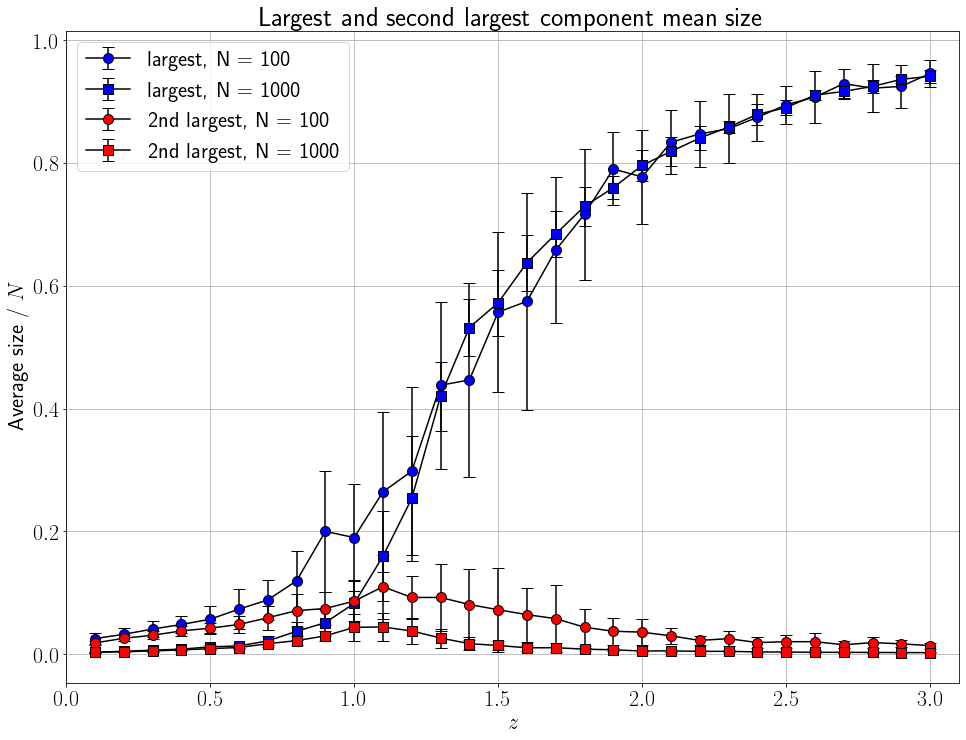

In [5]:
# plotting
fig = plt.figure(figsize=(16,12))

plt.errorbar(zs, L1avg[:len(zs)], L1err[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'largest, N = 100')
plt.errorbar(zs, L1avg[len(zs):], L1err[len(zs):], color='k', marker='s', mfc='b', ms=10, capsize=6,
            label = 'largest, N = 1000')
plt.errorbar(zs, L2avg[:len(zs)], L2err[:len(zs)], color='k', marker='o', mfc='r', ms=10, capsize=6,
            label = '2nd largest, N = 100')
plt.errorbar(zs, L2avg[len(zs):], L2err[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = '2nd largest, N = 1000')

plt.xlabel('$z$')
plt.ylabel('Average size / $N$')
plt.title('Largest and second largest component mean size')
plt.xlim([0,3.1])
plt.legend(loc=0)
plt.grid()

**Question 2(b)**

**Question 2(c)**

From the lecture material, the expected number of undirected edges $K$ and the average degree $<k>$ are

$$\mathbb{E}[K] = {N\choose2} p(z) = \frac{N-1}{2} z$$

and

$$\mathbb{E}[<k>] = (N-1) p(z) = \frac{N-1}{N} z$$

respectively.

Below we have plotted the average number of edges and the average degree as well as their corresponding standard deviation errors according to the relevant 20 realisations for all $z$.

With regards to average number of edges, we see both plots increase linearly with $z$ and closely follow their respective theoretical rates. We see the average number of edges for $N=1000$ increase at a greater rate when compared to $N=100$. This can be expected, as the coefficient in the theoretical expectation is $(1000-1)/2 = 499.5$ for $N=1000$ compared to $(100-1)/2 = 49.5$ for $N=100$, roughly ten times smaller.

With regards to the average degree, we see both plots increase linearly with $z$ and closely follow their respective theoretical rates. In fact, they increase at nearly the exact same rate. This is because the coefficient in the theoretical expectation is $(1000-1)/1000 = 0.999$ for $N=1000$ compared to $(100-1)/100 = 0.99$ for $N=100$.

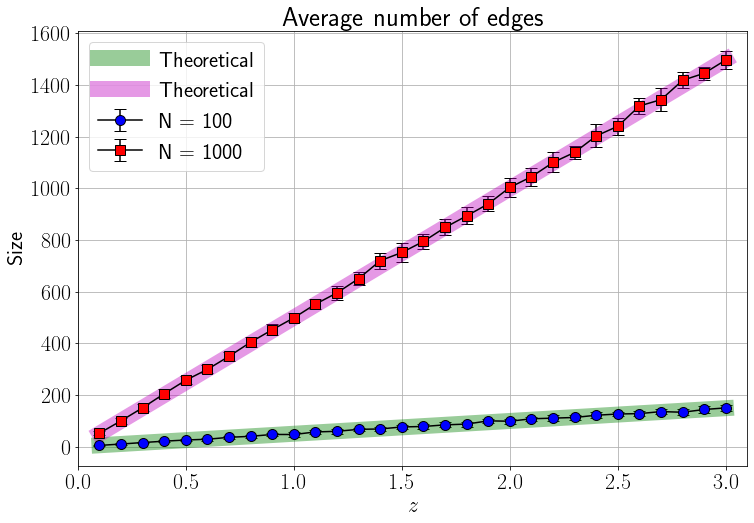

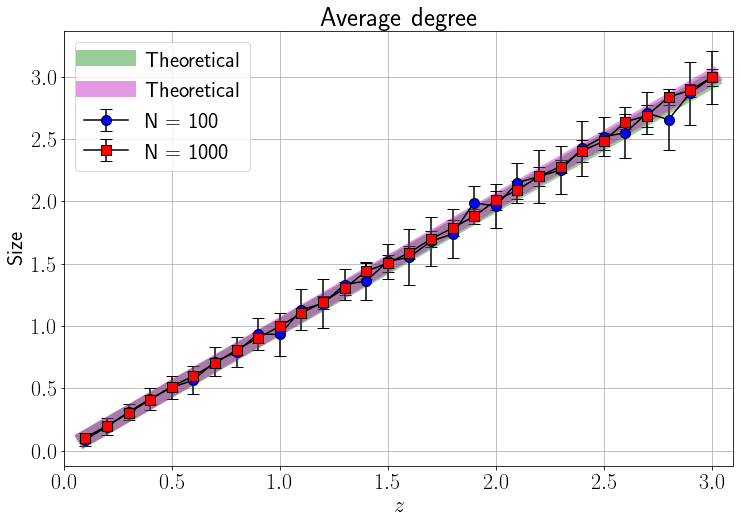

In [10]:
# plotting average number of edges
fig = plt.figure(figsize=(12,8))

plt.errorbar(zs, Eavg[:len(zs)], Eerr[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'N = 100')
plt.errorbar(zs, Eavg[len(zs):], Eerr[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = 'N = 1000')
plt.plot(zs, ((100-1)/2)*zs, color='g', linewidth=16, alpha=0.4, label='Theoretical')
plt.plot(zs, ((1000-1)/2)*zs, color='m', linewidth=16, alpha=0.4, label='Theoretical')

plt.xlabel('$z$')
plt.ylabel('Size')
plt.title('Average number of edges')
plt.xlim([0,3.1])
plt.legend(loc=0)
plt.grid()
plt.show()

# plotting average degree
fig = plt.figure(figsize=(12,8))

plt.errorbar(zs, davg[:len(zs)], davgerr[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'N = 100')
plt.errorbar(zs, davg[len(zs):], davgerr[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = 'N = 1000')
plt.plot(zs, ((100-1)/100)*zs, color='g', linewidth=16, alpha=0.4, label='Theoretical')
plt.plot(zs, ((1000-1)/1000)*zs, color='m', linewidth=16, alpha=0.4, label='Theoretical')

plt.xlabel('$z$')
plt.ylabel('Size')
plt.title('Average degree')
plt.xlim([0,3.1])
plt.legend(loc=0)
plt.grid()

**Question 2(d)**

In [12]:
# function to calculate the degree distribution of a graph
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)        # store degree values in array
    
    maxk = np.max(vk)
    k = np.arange(0,maxk+1) # possible values of k
    
    pk = np.zeros(maxk+1) # degree distribution p(k)
    for i in vk:
        pk[i] = pk[i] + 1
    pk = pk/sum(pk) # the sum of the elements of P(k) must to be equal to one
    
    return k,pk

Simulating 20 new realizations for $N = 1000$ and $z = 1.8$

In [13]:
N = 1000
z = 1.8
p = z/N

# degree distribution
ks = np.arange(0,16)
degdist = np.zeros(16)

for r in range(realisations):
    # generate ER random graph
    G = nx.gnp_random_graph(N,p)
    dist = degree_distribution(G)[1]
    
    for i in range(len(dist)):
        degdist[i] += dist[i] 

degdist = degdist/realisations

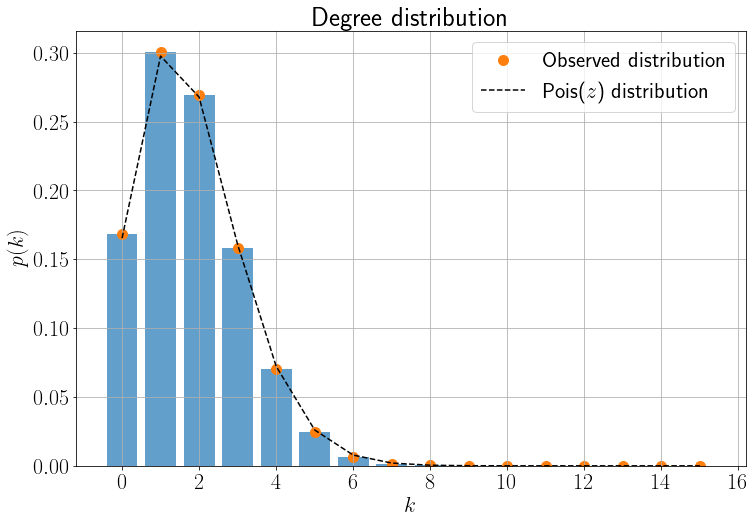

In [15]:
poisdist = stats.poisson.pmf(ks, mu=z)

# plotting
fig = plt.figure(figsize = (12,8))
plt.bar(ks, degdist, alpha=0.7)
plt.scatter(ks, degdist, s=100, label='Observed distribution')
plt.plot(ks, poisdist, 'k--', label='Pois($z$) distribution')
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.title("Degree distribution")
plt.legend(loc=0)
plt.grid()

The observed degree distribution from our 20 realizations closely matches the probability distribution of a Poisson random variable with rate $z = 1.8$.

This is because for an ER graph, the degree distribution follows $k_i \sim \textrm{Binomial}(N-1,p)$. However, for $N-1 >> 1$ and $p << 1$ we know that the Binomial distribution is approximately a Poisson distribution $\sim \textrm{Pois}(\lambda)$ with rate parameter $\lambda = (N-1)p \approx z$.

**Question 2(e)**

Simulating new realisations for $z \in \{0.5,1.5,5,10\}$

In [20]:
zs = [0.5, 1.5, 5, 10]
E = np.zeros((realisations,N))
avg_evals = np.zeros((len(zs),N))

j = 0
for z in zs:
    p = z/N
    
    for r in range(realisations):
        G = nx.gnp_random_graph(N,p)       # generate the graphs
        A = nx.to_numpy_matrix(G)          # find adjacency matrix
        evals, evecs = np.linalg.eig(A)    # calculate eigenvalues
        E[i,:] = np.sort(evals)            # sort in order

    avg_evals[j,:] = np.mean(E,axis=0)  #average the e'values over the realisations
    j += 1

/tmp/ipykernel_13559/550565762.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i,:] = np.sort(evals)            # sort in order


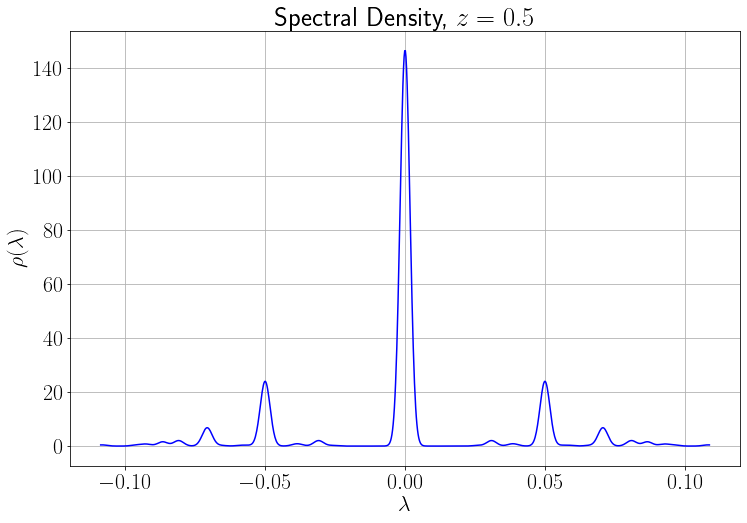

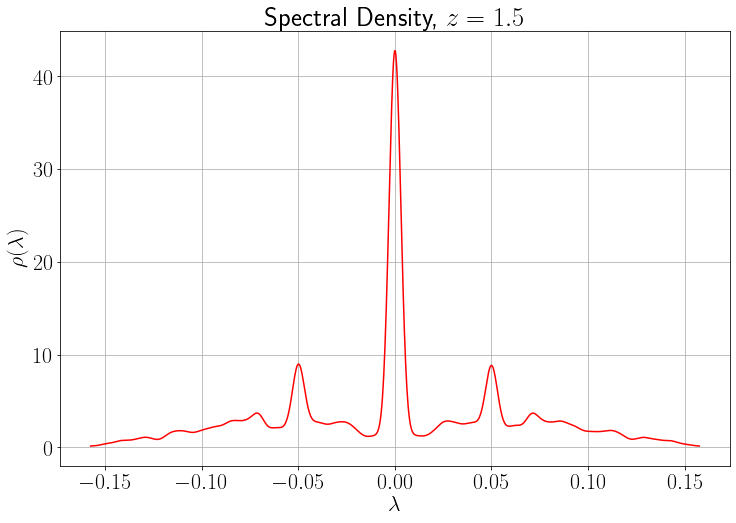

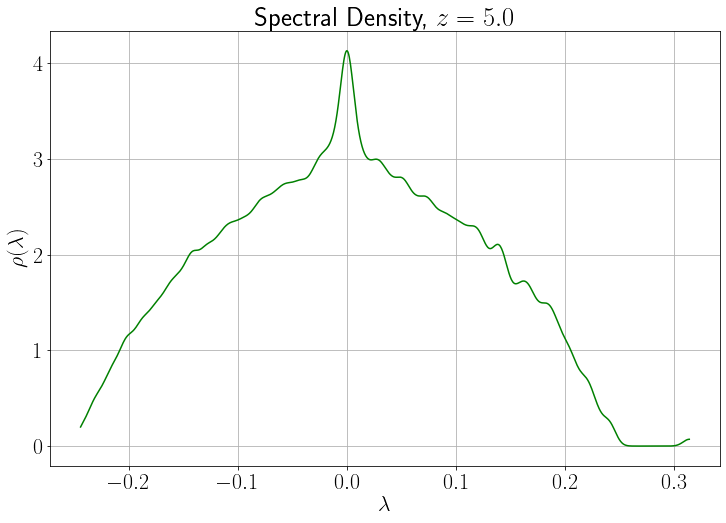

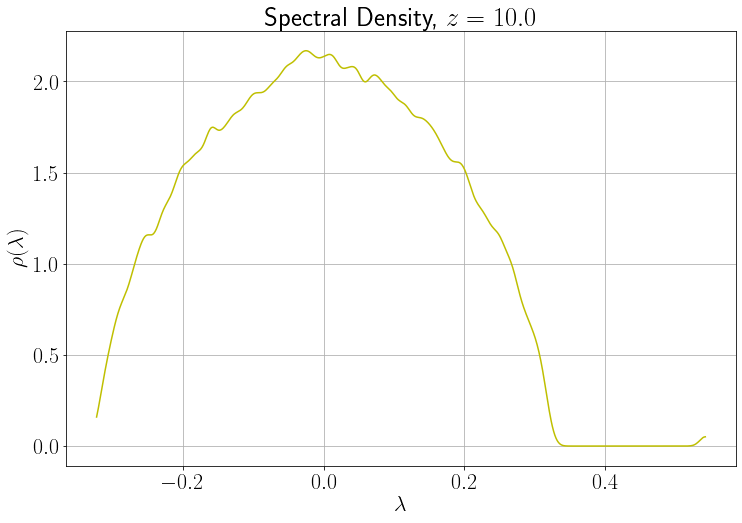

In [24]:
cols = ['b','r','g','y']

for i in range(len(zs)):
    fig = plt.figure(figsize = (12,8))
    
    # find the spectral density using a kernel density estimate 
    spectral_density = stats.gaussian_kde(avg_evals[i,:], bw_method = 0.05)

    #plot the density
    lambs = np.linspace(avg_evals[i,:].min(), avg_evals[i,:].max(), N)
    plt.plot(lambs, spectral_density(lambs), color=cols[i])
    
    plt.xlabel('$\lambda$')
    plt.ylabel('$\\rho(\lambda)$')
    plt.title('Spectral Density, $z = %.1f$' % zs[i])
    plt.grid()